In [2]:
import pandas as pd
import numpy as np        #importing necessary libaries
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('restaurant_train.csv')  #training dataset

In [4]:
df  #data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
df_test=pd.read_csv('restaurant_test.csv')    #test dataset 

In [6]:
df_test


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [7]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [9]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [10]:
df['RESTAURANT_ID'].unique()

array([ 9438, 13198, 10915, ..., 13228,  9686,  6134], dtype=int64)

In [11]:
df['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [12]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

In [13]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [14]:
df['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [15]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [16]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [17]:
df['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [18]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

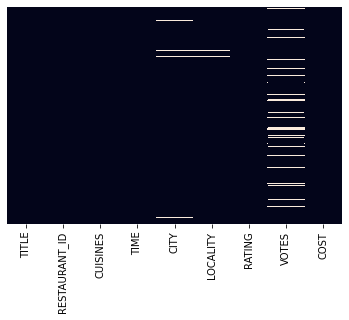

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [20]:
for col in ['CITY','LOCALITY','VOTES']:
    df[col].fillna(df[col].mode()[0],inplace=True)

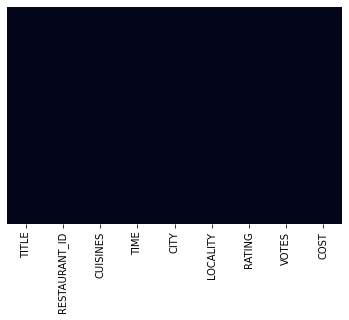

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [22]:
df.isnull().values.any()

True

In [23]:
# Making a list of missing value types
missing_values = ["?"]
df = pd.read_csv("restaurant_train.csv", na_values = missing_values)

In [24]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [25]:
for col in ['CITY','LOCALITY','VOTES','RATING']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [26]:
df.isnull().values.any()

False

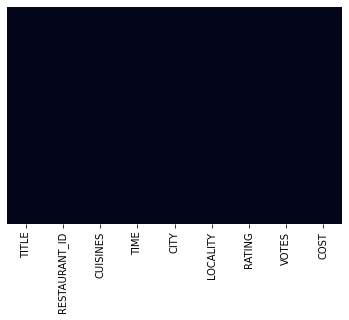

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [28]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [29]:
corr=df.corr()

In [30]:
corr

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [31]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [32]:
df_test.isnull().values.any()

True

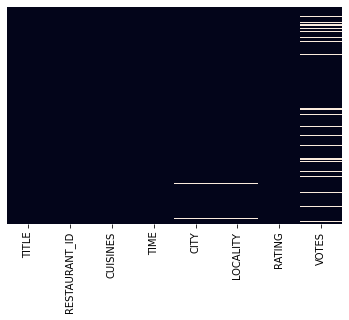

In [33]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)


In [34]:
for col in ['CITY','LOCALITY','VOTES']:
    df_test[col].fillna(df[col].mode()[0],inplace=True)

In [35]:
df_test.isnull().values.any()

True

In [36]:
# Making a list of missing value types
missing_values = ["?"]
df_test = pd.read_csv("restaurant_test.csv", na_values = missing_values)

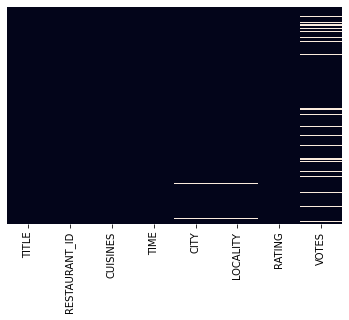

In [37]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)


In [38]:
for col in ['CITY','LOCALITY','VOTES']:
    df_test[col].fillna(df[col].mode()[0],inplace=True)

In [39]:
df_test.isnull().values.any()

True

In [40]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           2
VOTES            0
dtype: int64

In [41]:
missing_values = ["?"]
df_test = pd.read_csv("restaurant_test.csv", na_values = missing_values)

In [42]:
df_test['RATING'].fillna(df['RATING'].mode()[0],inplace=True)

In [43]:
df_test.isnull().values.any()

True

In [44]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             0
VOTES            402
dtype: int64

In [45]:
for col in ['CITY','LOCALITY','VOTES']:
    df_test[col].fillna(df[col].mode()[0],inplace=True)

In [46]:
df_test.isnull().values.any()      #null values have been removed for test dataset

False

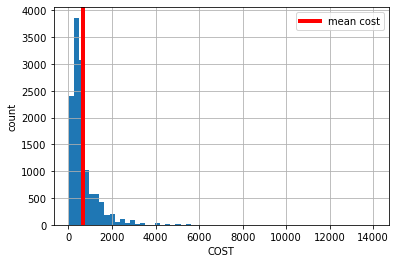

MEAN COST = 655.2522458628841


In [47]:
#cheacking mean fee

fee = df['COST'].hist(bins=60)
mean_val=np.mean(df['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean cost')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()
print('MEAN COST =',df['COST'].mean())

In [48]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()    #converting object to integer

In [49]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [51]:
df['TITLE'] = le.fit_transform(df['TITLE'])                     

In [52]:
df['CUISINES'] = le.fit_transform(df['CUISINES'])                     

In [53]:
df['TIME'] = le.fit_transform(df['TIME'])                     

In [54]:
df['CITY'] = le.fit_transform(df['CITY'])                     

In [55]:
df['LOCALITY'] = le.fit_transform(df['LOCALITY'])                     

In [56]:
df['RATING'] = le.fit_transform(df['RATING'])                     

In [57]:
df['VOTES'] = le.fit_transform(df['VOTES'])                     

In [58]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


In [59]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,44 votes


In [60]:
df_test['TITLE'] = le.fit_transform(df_test['TITLE'])                     

In [61]:
df_test['CUISINES'] = le.fit_transform(df_test['CUISINES'])                     

In [62]:
df_test['TIME'] = le.fit_transform(df_test['TIME'])                     

In [63]:
df_test['CITY'] = le.fit_transform(df_test['CITY'])                     

In [64]:
df_test['LOCALITY'] = le.fit_transform(df_test['LOCALITY'])                     

In [65]:
df_test['RATING'] = le.fit_transform(df_test['RATING'])                     

In [66]:
df_test['VOTES'] = le.fit_transform(df_test['VOTES'])                     

In [67]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,110,662,23,823
1,75,12680,1632,933,96,221,22,871
2,23,1411,1455,219,96,411,18,575
3,66,204,208,1071,41,456,18,179
4,75,13453,1637,208,78,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,108,597,19,487
4227,66,1247,267,262,9,237,23,722
4228,75,8617,679,1052,41,696,17,789
4229,75,6485,1541,215,78,332,0,685


In [68]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


In [69]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             3.978801
dtype: float64

In [70]:
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])     #treating skewness
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [71]:
df.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -3.537363
VOTES           -0.316806
COST             1.641138
dtype: float64

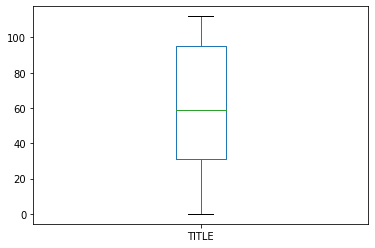

In [72]:
df['TITLE'].plot.box()                      #cheacking outliers with box plot

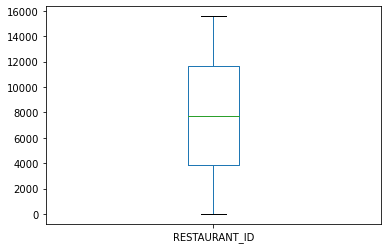

In [73]:
df['RESTAURANT_ID'].plot.box()                  

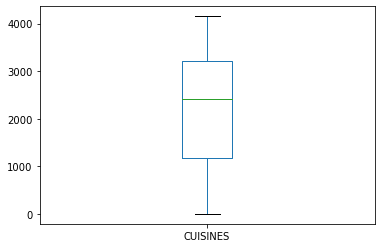

In [74]:
df['CUISINES'].plot.box()                  

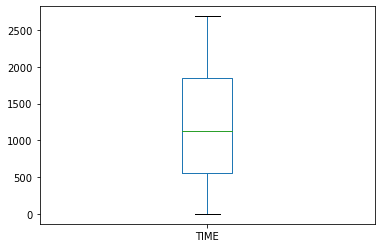

In [75]:
df['TIME'].plot.box()                  

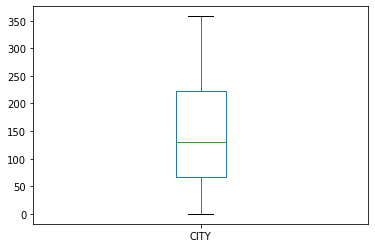

In [76]:
df['CITY'].plot.box()                  

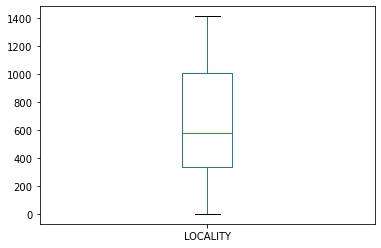

In [77]:
df['LOCALITY'].plot.box()                  

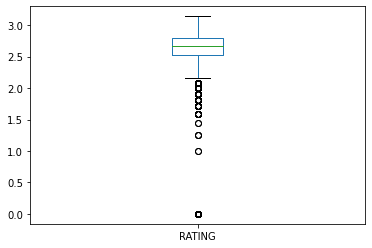

In [78]:
df['RATING'].plot.box()                  

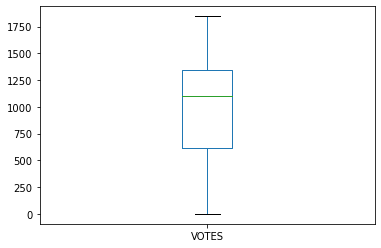

In [79]:
df['VOTES'].plot.box()                  

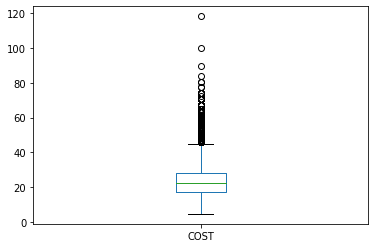

In [80]:
df['COST'].plot.box()                  

In [82]:
from scipy.stats import zscore
z = np.abs(zscore(df))                         #treaating outlier
z

array([[0.86888688, 0.37269233, 0.32540837, ..., 0.00431854, 0.59388432,
        1.14180408],
       [0.80783894, 1.20737672, 1.61638078, ..., 0.48320013, 0.08589126,
        1.57073802],
       [0.86888688, 0.70057234, 0.61526483, ..., 0.17494033, 0.57914305,
        0.47495511],
       ...,
       [0.35207201, 0.74896628, 0.12224961, ..., 0.3339715 , 0.9047573 ,
        1.29019066],
       [0.86888688, 0.36076439, 1.055448  , ..., 0.08605103, 0.00944312,
        0.3940994 ],
       [0.86888688, 0.29505519, 0.59034881, ..., 0.18026896, 1.06433876,
        0.07743403]])

In [83]:
threshold = 3

In [84]:
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1297,  1345,
        1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,  1543,
        1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,  1696,
        1701,  1711,  1748,  1759,  1764,  1792,  1806,  1828,  1839,
        1855,  1878,  1884,  1884,  1903,  1916,  1930,  1931,  1983,
        2025,  2039,  2053,  2082,  2092,  2096,  2100,  2109,  2111,
        2115,  2124,  2207,  2251,  2254,  2313,  2327,  2333,  2339,
        2349,  2369,  2407,  2434,  2439,  2459,  2479,  2488,  2495,
        2500,  2531

In [85]:
new_df = df[(z<3).all(axis=1)]

In [86]:
print(df.shape,'\t\t',new_df.shape)

(12690, 9) 		 (11986, 9)


In [87]:
df = new_df
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,2.571282,1278,34.641016
1,33,13198,289,1885,67,1046,2.843867,950,38.729833
2,31,10915,2976,661,67,1101,2.668402,712,28.284271
3,95,6346,4130,275,222,136,2.802039,787,28.284271
4,50,15387,1766,615,222,620,2.668402,470,17.320508
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,2.668402,1349,22.360680
12686,33,9686,2143,1177,222,133,2.884499,191,42.426407
12687,71,11133,2088,1137,239,1342,2.758924,1428,36.055513
12688,31,6134,3506,1837,67,631,2.519842,996,20.000000


In [88]:
x= df.drop(columns=['COST'],axis=1)
x.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,9438,2627,739,320,285,2.571282,1278
1,33,13198,289,1885,67,1046,2.843867,950
2,31,10915,2976,661,67,1101,2.668402,712
3,95,6346,4130,275,222,136,2.802039,787
4,50,15387,1766,615,222,620,2.668402,470


In [89]:
y= df['COST']
y.head()

0    34.641016
1    38.729833
2    28.284271
3    28.284271
4    17.320508
Name: COST, dtype: float64

In [90]:
print('x shape =',x.shape,'\t\t','y shape =',y.shape)    #checking shape of x and y

x shape = (11986, 8) 		 y shape = (11986,)


In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [92]:
x = sc.fit_transform(x)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    #building model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =.20,random_state=42)

In [95]:
print('x_train.shape =',x_train.shape,'\t\t','x_test.shape =',x_test.shape)
print('y_train.shape =',y_train.shape,'\t\t','y_test.shape =',y_test.shape)

x_train.shape = (9588, 8) 		 x_test.shape = (2398, 8)
y_train.shape = (9588,) 		 y_test.shape = (2398,)


In [96]:
lr=LinearRegression()

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
lr.score(x_train,y_train)

0.21837126986974087

In [99]:
pred=lr.predict(x_test)
pred

array([19.83525201, 20.19802673, 20.11884429, ..., 23.25982284,
       20.26947382, 21.13753471])

In [100]:
print('error')

print("mean absolute error =",mean_absolute_error(y_test,pred))
print("mean squared error =",mean_squared_error(y_test,pred))

print("root mean squared error =",np.sqrt(mean_squared_error(y_test,pred)))

print("r2_score =",r2_score(y_test,pred))

error
mean absolute error = 5.4527396264792705
mean squared error = 53.577436090264634
root mean squared error = 7.319660927274202
r2_score = 0.2110862229390994


In [101]:
import joblib

In [102]:
joblib.dump(lr,"restaurant_cost")   #saving model

['restaurant_cost']